In [ ]:
!pip install torch torchvision
!pip install easyocr
!pip install opencv-python
!pip install matplotlib


In [ ]:
import torch
import cv2
import easyocr
from google.colab.patches import cv2_imshow

# Load YOLOv5 model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load OCR model
ocr_model = easyocr.Reader(['en'])

def detect_overlap(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Use YOLOv5 to detect humans
    results = yolo_model(img, size=640)
    human_boxes = results.xyxy[0][results.xyxy[0][:, 5] == 0][:, :4]

    # Use OCR to detect text
    ocr_results = ocr_model.readtext(image_path)
    text_boxes = [[int(b[0][0]), int(b[0][1]), int(b[2][0]), int(b[2][1])] for b, _, _ in ocr_results]

    # Draw bounding boxes for humans and text
    for box in human_boxes:
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    for box in text_boxes:
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[0]+box[2]), int(box[1]+box[3])), (0, 0, 255), 2)

    # Check for overlap
    overlap_detected = False
    for human_box in human_boxes:
        for text_box in text_boxes:
            x_overlap = max(0, min(human_box[2], text_box[2]) - max(human_box[0], text_box[0]))
            y_overlap = max(0, min(human_box[3], text_box[3]) - max(human_box[1], text_box[1]))
            overlap_area = x_overlap * y_overlap
            if overlap_area > 0:
                overlap_detected = True

    # Display image
    if overlap_detected:
        print("Overlap detected between human and text boxes.")
    else:
        print("No overlap detected.")
    cv2_imshow(img)

Overlap detected between human and text boxes.


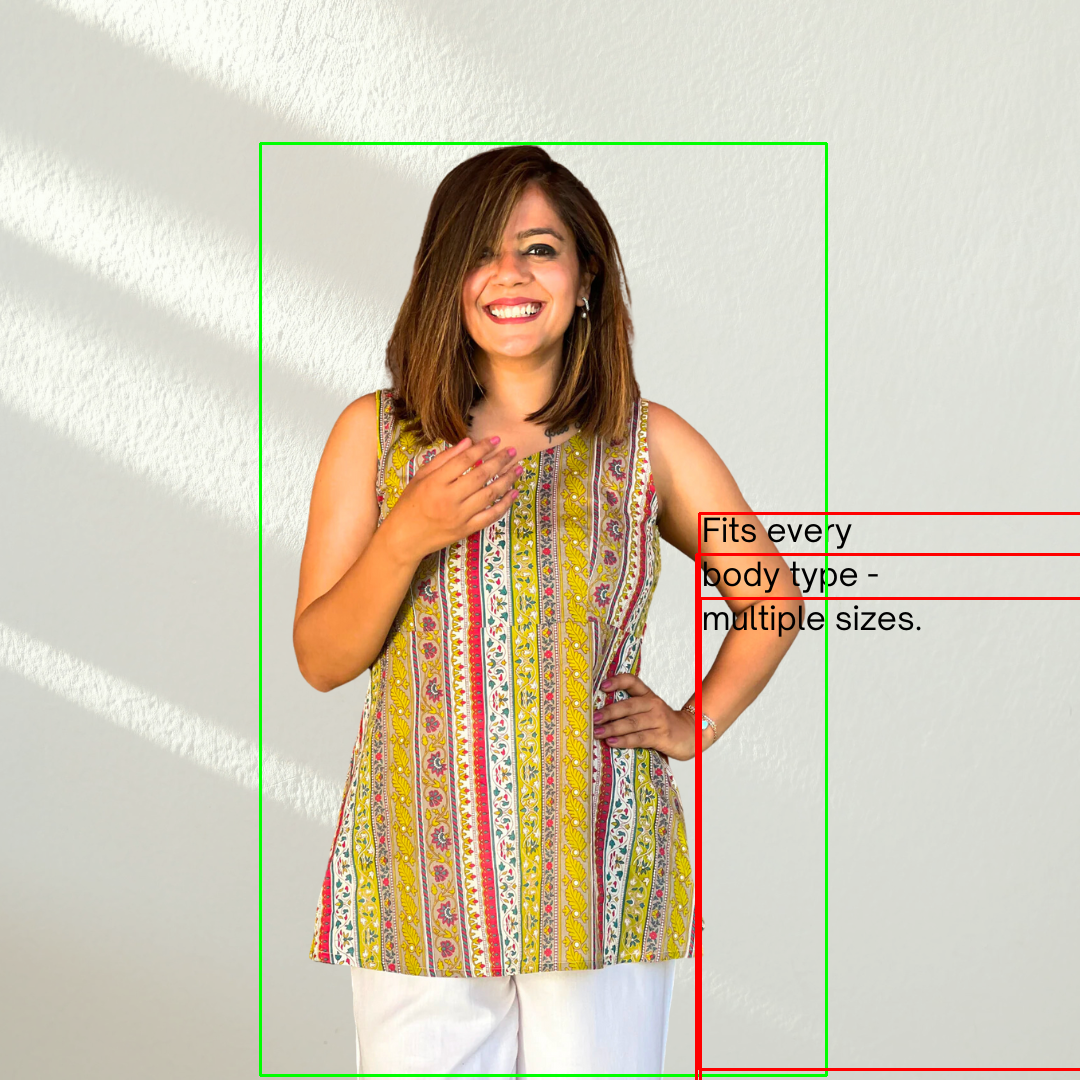

In [31]:
detect_overlap("/content/1_Overlap.png")

No overlap detected.


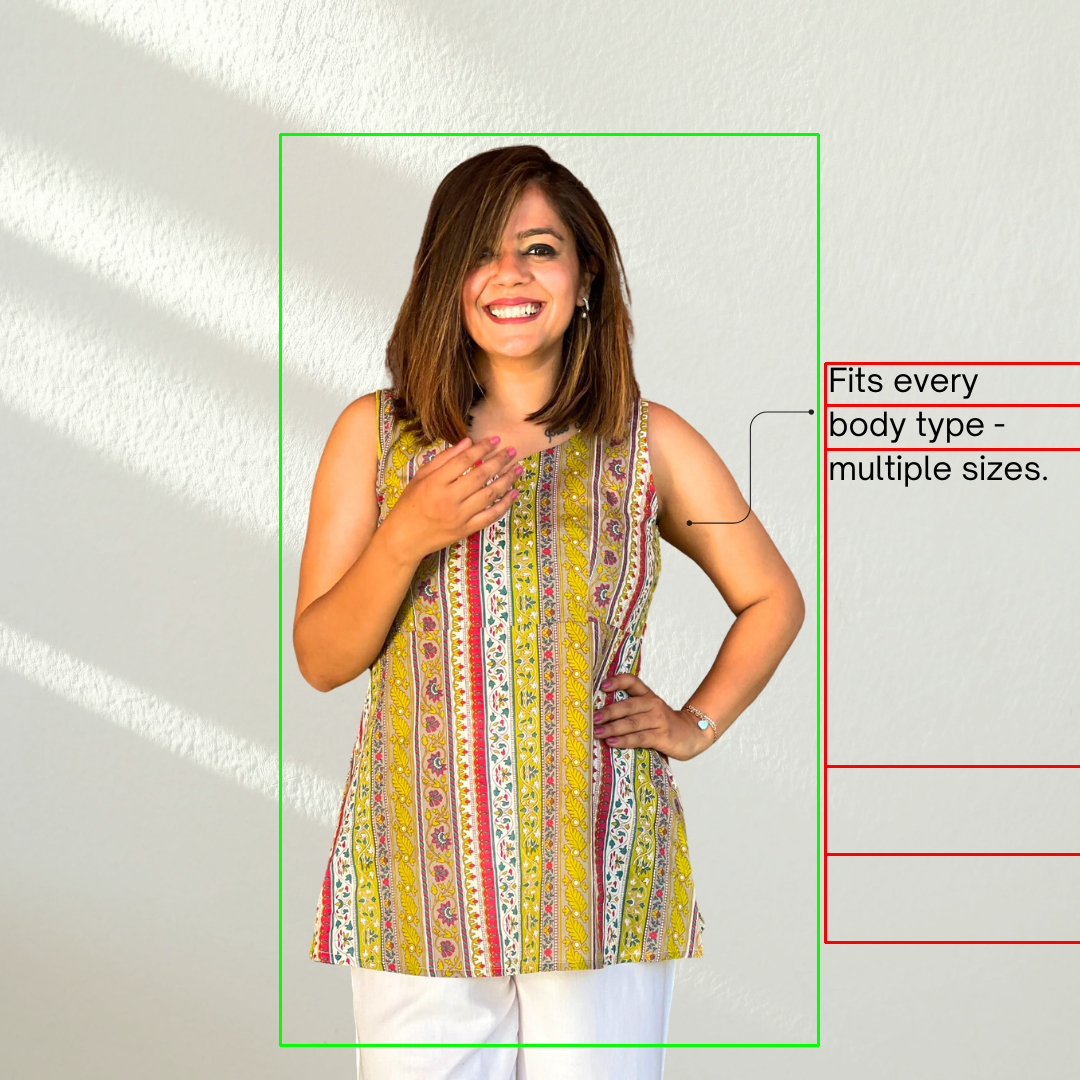

In [32]:
detect_overlap("/content/2_NoOverlap.png")

No overlap detected.


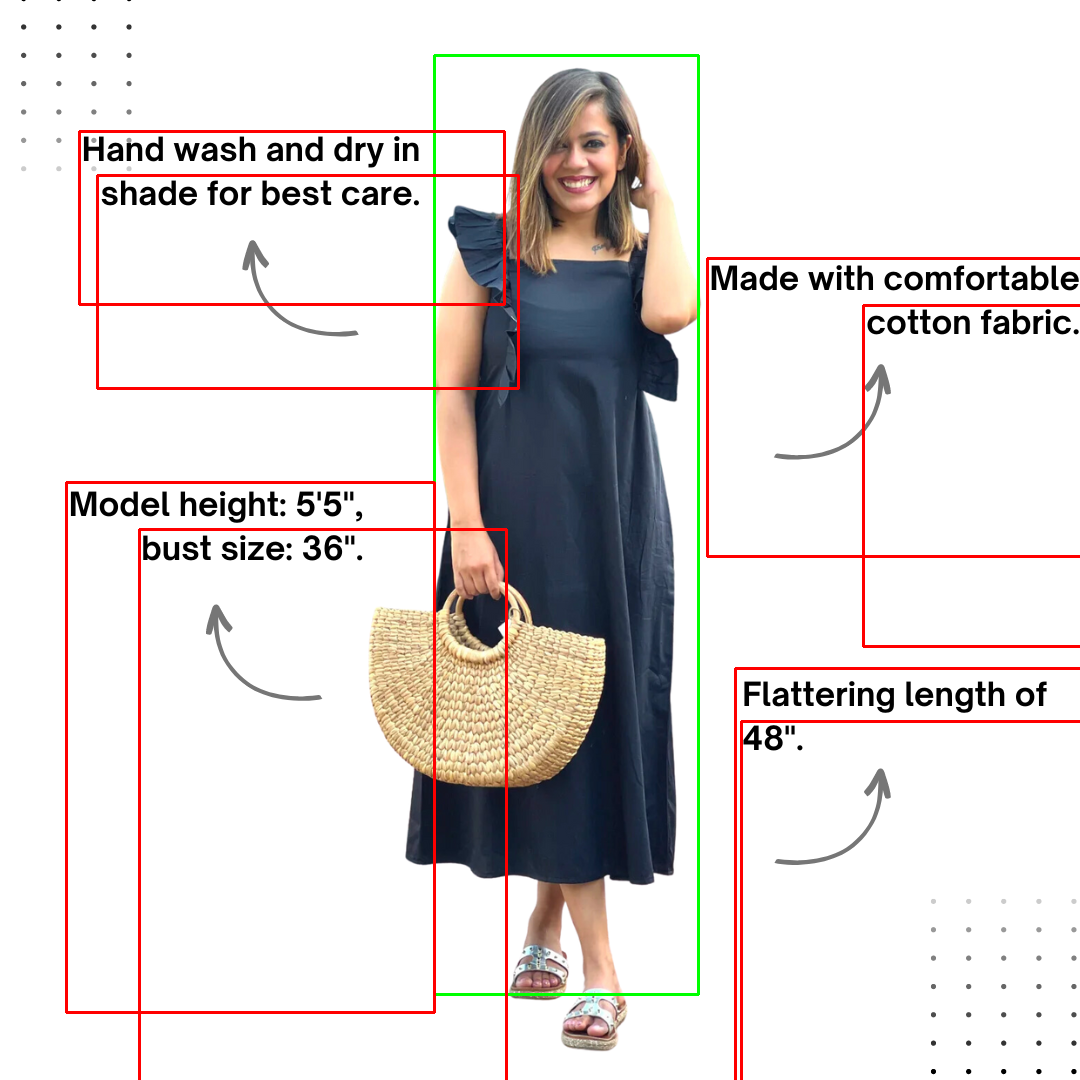

In [33]:
detect_overlap("/content/3_NoOverlap.png")

Overlap detected between human and text boxes.


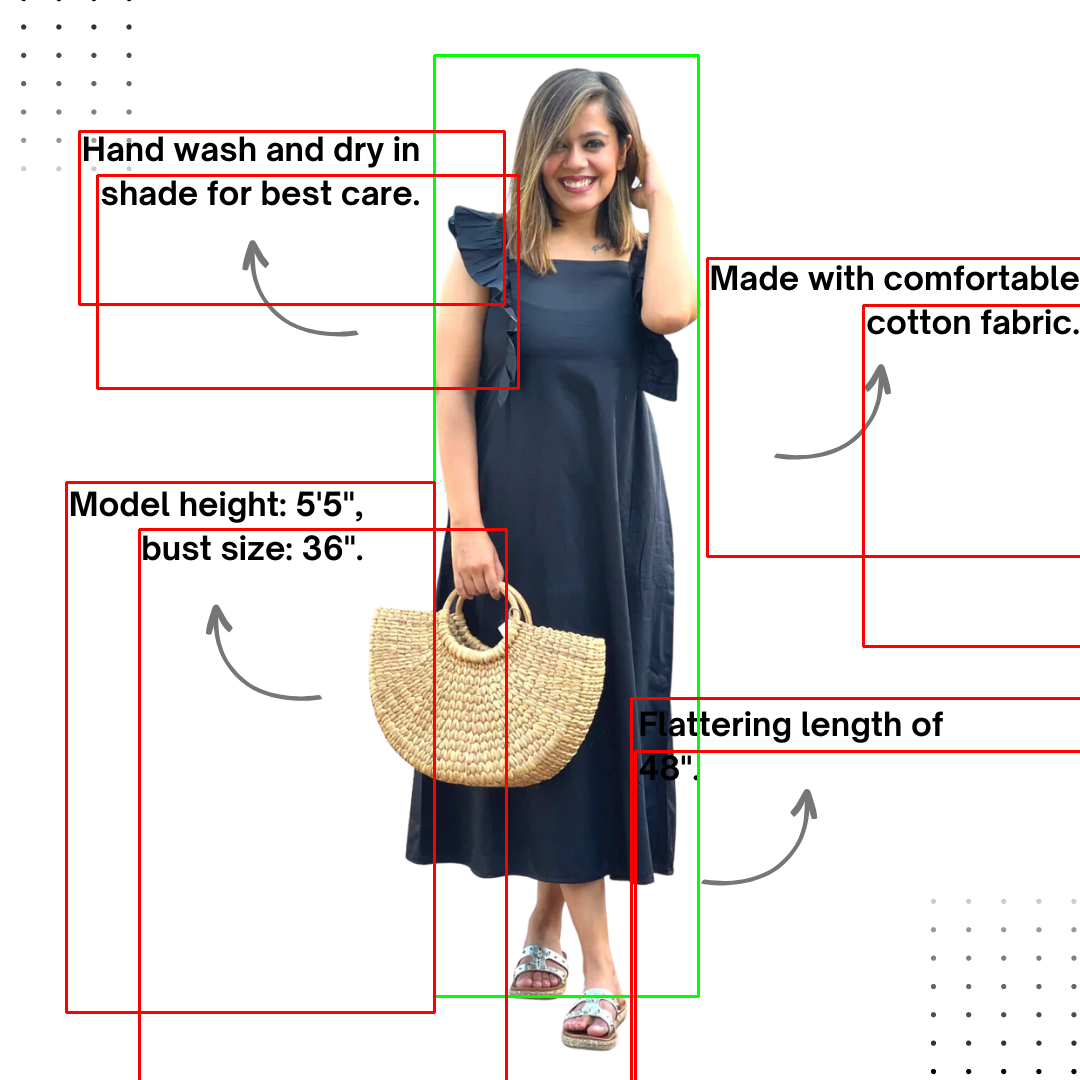

In [34]:
detect_overlap("/content/4_Overlap.png")

No overlap detected.


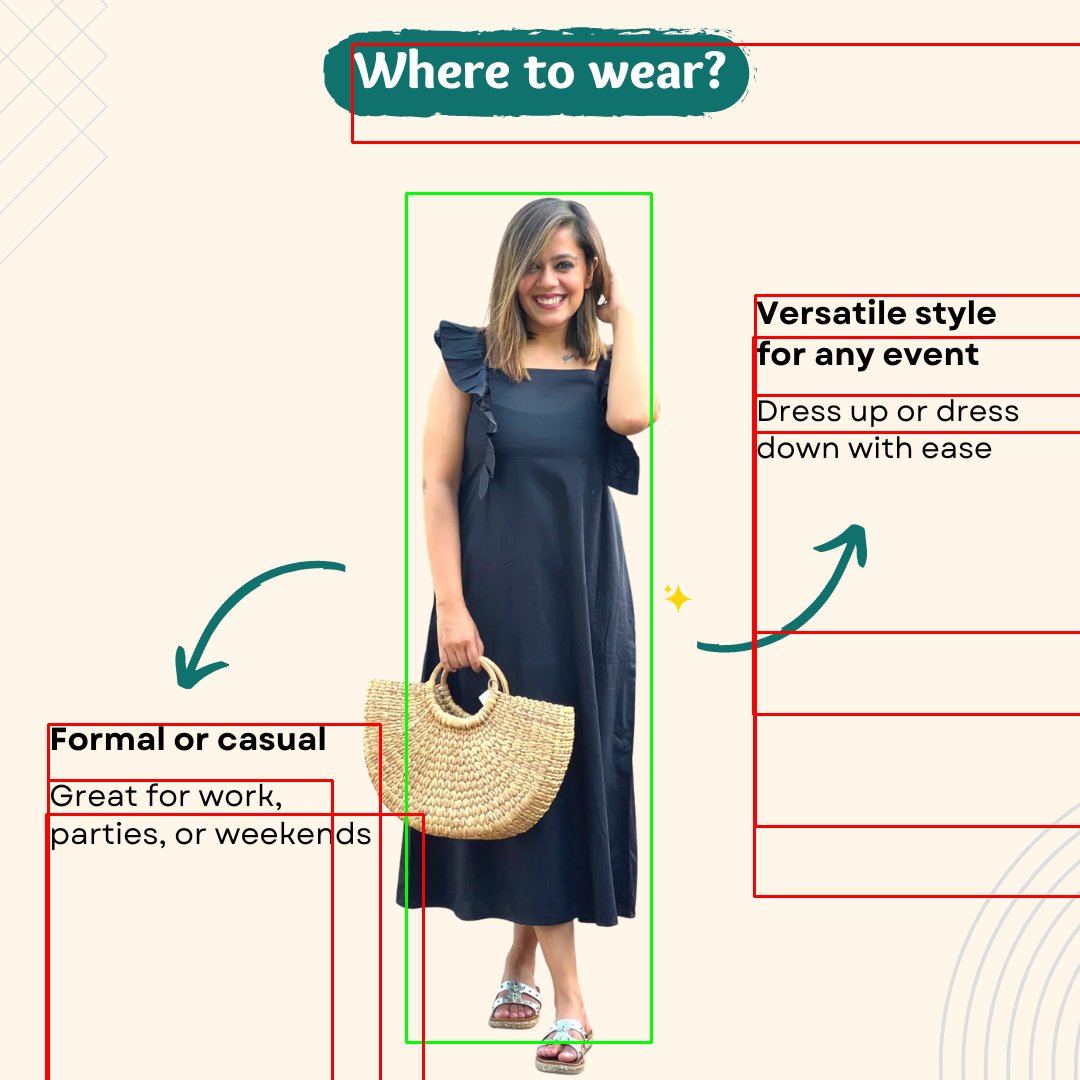

In [35]:
detect_overlap("/content/5_NoOverlap.png")

Overlap detected between human and text boxes.


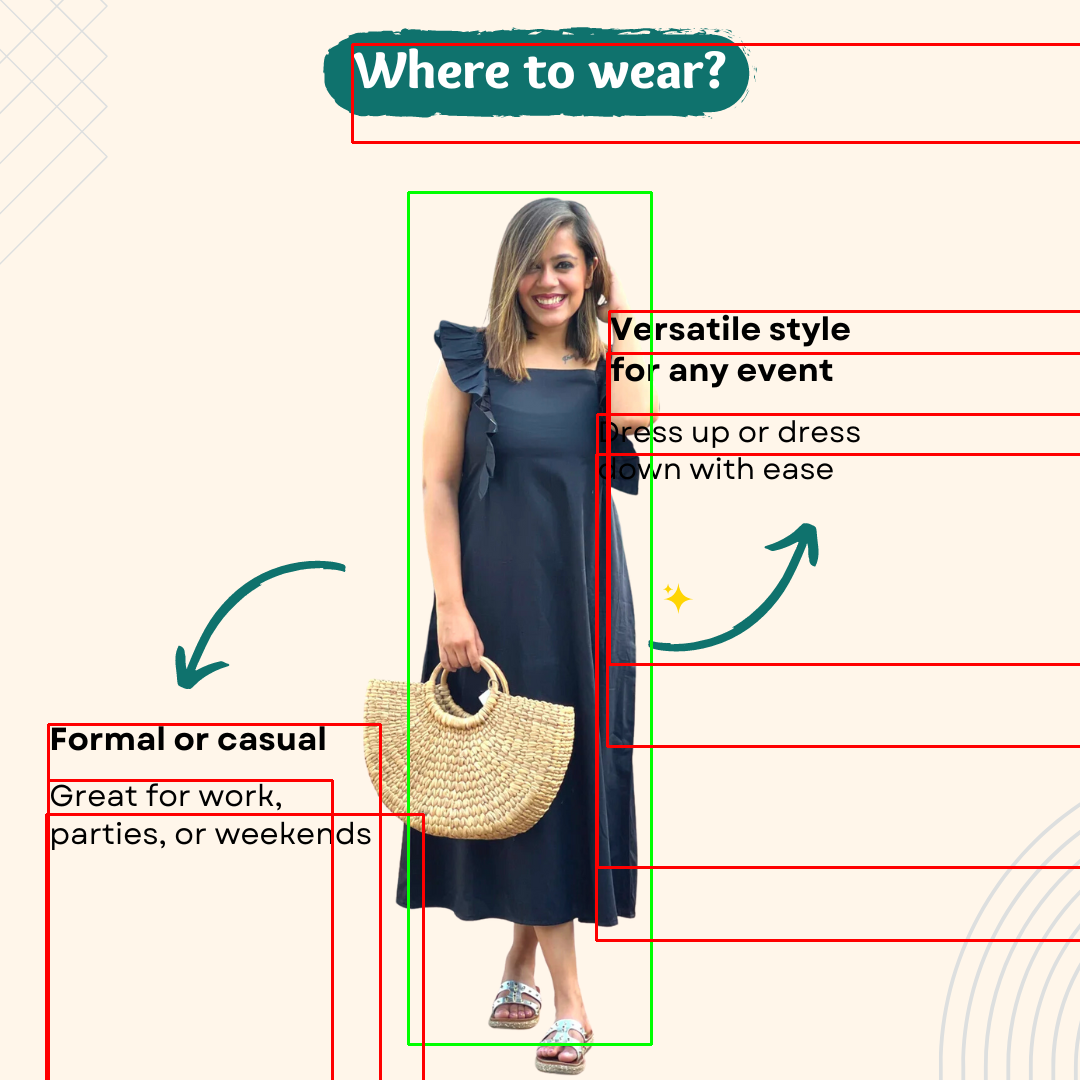

In [36]:
detect_overlap("/content/6_Overlap.png")

Overlap detected between human and text boxes.


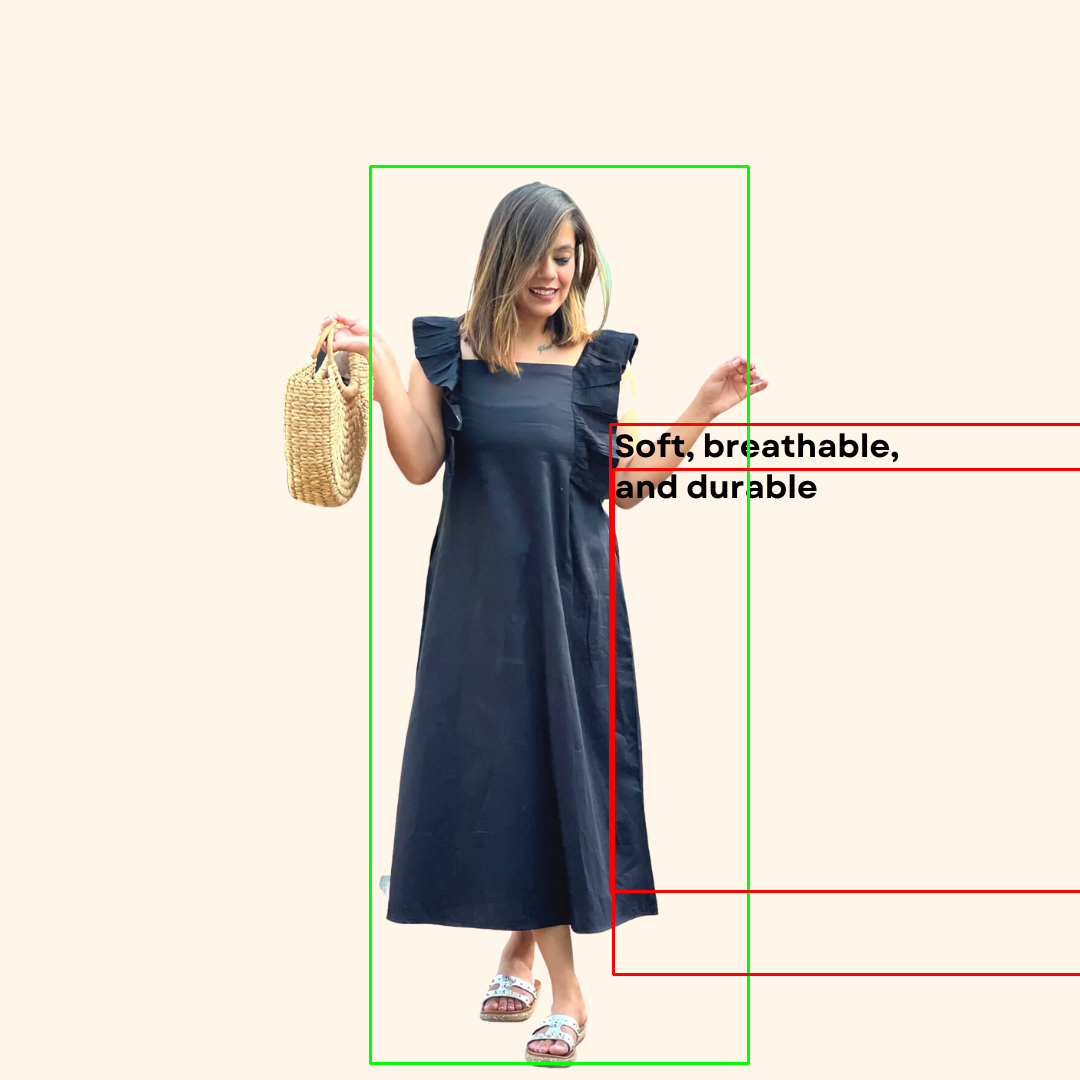

In [37]:
detect_overlap("/content/7_Overlap.png")